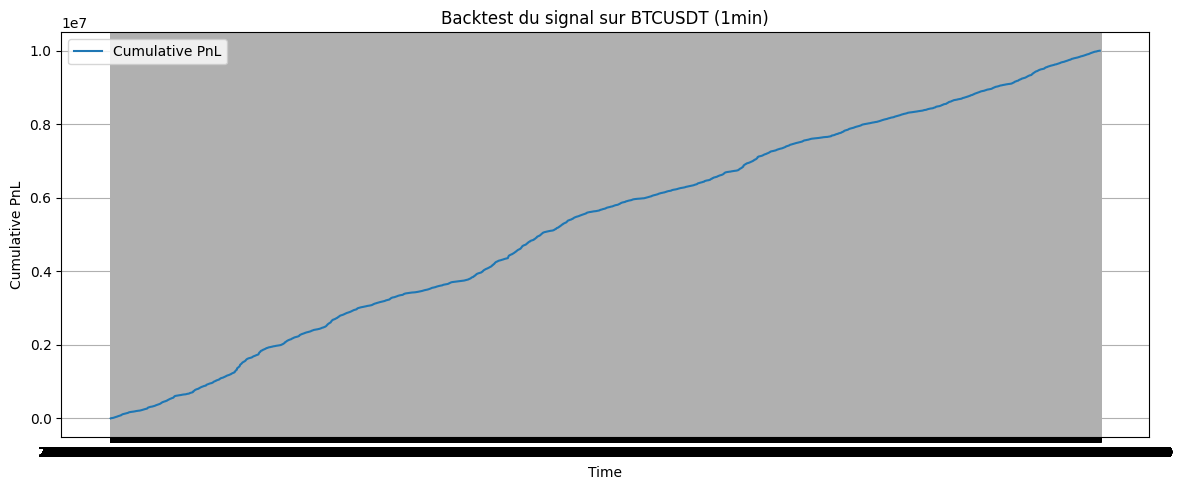

In [2]:
# Imports
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
from src.backtester import simple_signal_backtest

# Chargement des données
df = pd.read_csv("../data/processed_orderbook_with_label.csv")

# Recréer le signal à partir du label
df["signal"] = df["label"]  # position = 1 si le modèle prédit hausse, 0 sinon

# Backtest simple (5 min holding)
backtest_df = simple_signal_backtest(df, signal_col="signal", holding_period=5, cost_per_trade=5.0)

# Visualisation
# Sauvegarde du graphique
plt.figure(figsize=(12, 5))
plt.plot(backtest_df["timestamp"], backtest_df["cum_pnl"], label="Cumulative PnL")
plt.title("Backtest du signal sur BTCUSDT (1min)")
plt.xlabel("Time")
plt.ylabel("Cumulative PnL")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("../results/figures/sample_pnl_plot.png")  # 📁 pour affichage dans le README
plt.show()



In [3]:
import numpy as np

# Sécurité : enlever les NaN
backtest_df = backtest_df.dropna(subset=["pnl", "cum_pnl"])

# Sharpe Ratio
returns = backtest_df["pnl"]
sharpe = returns.mean() / returns.std() * np.sqrt(252 * 24 * 60)  # annualisé minute -> année

# Max Drawdown
cum_pnl = backtest_df["cum_pnl"]
rolling_max = cum_pnl.cummax()
drawdown = rolling_max - cum_pnl
max_drawdown = drawdown.max()

# Hit Ratio
hits = (backtest_df["pnl"] > 0).sum()
hit_ratio = hits / len(backtest_df)

# Nombre de trades
num_trades = backtest_df["position"].sum()

# Résumé
print("Performance du signal")
print(f"Sharpe Ratio        : {sharpe:.2f}")
print(f"Max Drawdown ($)    : {max_drawdown:.2f}")
print(f"Hit Ratio           : {hit_ratio:.2%}")
print(f"Nombre de trades    : {int(num_trades)}")


Performance du signal
Sharpe Ratio        : 297.62
Max Drawdown ($)    : 29.92
Hit Ratio           : 47.63%
Nombre de trades    : 108614


In [4]:
print("Distribution des signaux :")
print(backtest_df["position"].value_counts())

print("\nStatistiques PnL :")
print(backtest_df["pnl"].describe())

print("\nQuelques lignes du backtest_df :")
print(backtest_df[["timestamp", "position", "pnl", "cum_pnl"]].head(10))


Distribution des signaux :
position
0    108802
1    108614
Name: count, dtype: int64

Statistiques PnL :
count    217416.000000
mean         46.002862
std          93.111093
min          -4.990000
25%          -0.000000
50%          -0.000000
75%          59.720000
max        2797.910000
Name: pnl, dtype: float64

Quelques lignes du backtest_df :
             timestamp  position     pnl  cum_pnl
0  2025-01-01 00:19:00         0   -0.00    -0.00
1  2025-01-01 00:20:00         0   -0.00    -0.00
2  2025-01-01 00:21:00         0   -0.00    -0.00
3  2025-01-01 00:22:00         0   -0.00    -0.00
4  2025-01-01 00:23:00         0   -0.00    -0.00
5  2025-01-01 00:24:00         0   -0.00    -0.00
6  2025-01-01 00:25:00         1   16.90    16.90
7  2025-01-01 00:26:00         1   58.72    75.62
8  2025-01-01 00:27:00         1  103.71   179.33
9  2025-01-01 00:28:00         1  199.68   379.01
